# • Part B: Practical (using Python, Excel, or Google Sheets)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load the dataset
data = pd.read_excel('Household_Data.xlsx')
data

,Household_ID,Age_of_Household_Head,Household_Income,Education_Level,Family_Size,Owns_House,Urban_Rural
0,HH1000,63,30776,Graduate,2,Yes,Urban
1,HH1001,76,44993,Secondary,8,No,Rural
2,HH1002,53,19289,Primary,8,No,Rural
3,HH1003,39,35787,Post-Grad,2,Yes,Urban
4,HH1004,67,39102,Graduate,6,Yes,Urban
...,...,...,...,...,...,...,...
155,HH1155,79,42930,Secondary,8,Yes,Urban
156,HH1156,38,31660,Secondary,6,No,Urban
157,HH1157,63,38083,Secondary,7,No,Urban
158,HH1158,51,16591,Graduate,4,Yes,Urban


**1. Types of Data**

**Identify which columns are categorical and which are numerical.**

In [56]:
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()
print(f"Categorical Columns: {categorical_columns}")
print("\n-------------------------------------------------------\n")
numerical_columns = data.select_dtypes(include = ['number']).columns.tolist()
print(f"Numerical Columns: {numerical_columns}")


Categorical Columns: ['Household_ID', 'Education_Level', 'Owns_House', 'Urban_Rural']

-------------------------------------------------------

Numerical Columns: ['Age_of_Household_Head', 'Household_Income', 'Family_Size']


**2. Central Tendancy**

**Calculate Mean, Median, and Mode of Household Income and Age.**

In [57]:
# Mean
income_mean = sum(data['Household_Income']) / len(data['Household_Income'])
age_mean = sum(data['Age_of_Household_Head']) / len(data['Age_of_Household_Head'])

# Median
income_sorted = sorted(data['Household_Income'])
age_sorted = sorted(data['Age_of_Household_Head'])

n = len(data)
income_median = (income_sorted[n//2 - 1] + income_sorted[n//2]) / 2
age_median = (age_sorted[n//2 - 1] + age_sorted[n//2]) / 2

# Mode
income_mode = data['Household_Income'].value_counts().idxmax()
age_mode = data['Age_of_Household_Head'].value_counts().idxmax()

{"Household_Income": {
        "Mean": income_mean,
        "Median": income_median,
        "Mode": income_mode},

"Age_of_Household_Head": {
    "Mean": age_mean,
    "Median": age_median,
    "Mode": age_mode}}

{'Household_Income': {'Mean': 39219.35625,
  'Median': 39630.0,
  'Mode': np.int64(10000)},
 'Age_of_Household_Head': {'Mean': 51.18125,
  'Median': 50.0,
  'Mode': np.int64(68)}}

- **Interpret the central tendency and comment on income distribution.**

In [58]:
# Household Income
# Mean = 39,219, Median = 39,630, Mode = 10,000
# Mode is much lower than mean and median.
# This suggests the presence of a few very low-income households pulling the mode down.
# But mean and median are close, so:
# Income distribution is slightly right-skewed (a few low outliers), but mostly balanced.

**3. Measure of Dispersion**

**Calculate Range, Variance, and Standard Deviation of Household Income.**

In [59]:
# Range
income_range = max(data['Household_Income']) - min(data['Household_Income'])
print(f"Range of Household Income: {income_range}")

# Variance
var_income = list(data['Household_Income'])
mean_income = sum(var_income) / len(var_income)
squared_diff = [(x - mean_income) ** 2 for x in var_income]
var_of_income = round(sum(squared_diff)/ (len(var_income)),2)
sample_of_income = round(sum(squared_diff)/ (len(var_income) - 1),2)
print(f"Variance of Household Income: {var_of_income}")
print(f"Sample Variance of Household Income: {sample_of_income}")

# Standard Deviation
std_of_income = round(np.sqrt(var_of_income), 2)
sample_std_of_income = round(np.sqrt(sample_of_income), 2)
print(f"Standard Deviation of Household Income: {std_of_income}")
print(f"Sample Standard Deviation of Household Income: {sample_std_of_income}")

Range of Household Income: 64100
Variance of Household Income: 218997589.52
Sample Variance of Household Income: 220374932.85
Standard Deviation of Household Income: 14798.57
Sample Standard Deviation of Household Income: 14845.03


- **Find IQR (Interquartile Range) and comment on income spread.**

In [60]:
df = np.array(data['Household_Income'])
q1 = np.percentile(df, 25)
q2 = np.percentile(df, 50)
q3 = np.percentile(df, 75)
print(f"Quartiles: Q1 = {q1}, Q2 = {q2}, Q3 = {q3}")

print("Interquartile Range calculation:")
iqr = q3 - q1
print(f"Interquartile Range (IQR): {iqr}")

Quartiles: Q1 = 28456.75, Q2 = 39630.0, Q3 = 48812.75
Interquartile Range calculation:
Interquartile Range (IQR): 20356.0


**4. Distribution**

- **Plot a histogram of Household Income.**

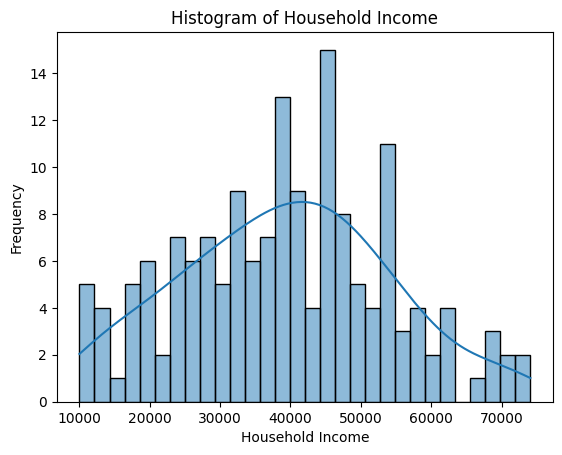

In [61]:
sns.histplot(data['Household_Income'], bins=30, kde=True)
plt.title('Histogram of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.show()

- **Fit a Gaussian Normal Distribution curve.**

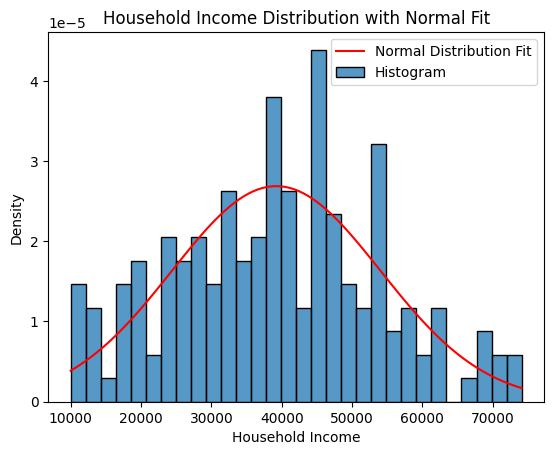

In [62]:
from scipy.stats import norm
mean_income = np.mean(data['Household_Income'])
std_income = np.std(data['Household_Income'], ddof=1)
x = np.linspace(min(data['Household_Income']), max(data['Household_Income']), 100)
pdf = norm.pdf(x, mean_income, std_income)
sns.histplot(data['Household_Income'], bins=30, kde=False, stat='density', label='Histogram')
plt.plot(x, pdf, color='red', label='Normal Distribution Fit')
plt.title('Household Income Distribution with Normal Fit')
plt.xlabel('Household Income')
plt.ylabel('Density')
plt.legend()
plt.show()

- **Calculate Skewness and Kurtosis of the income data.**

In [63]:
skewness = (3*(income_mean - income_median)) / std_of_income
print(f"Skewness of Household Income: {skewness:.2f}")

numerator = np.mean((data['Household_Income'] - income_mean)**4)
denominator = std_of_income**4
kurtosis = numerator / denominator
print(f"Kurtosis of Household Income: {kurtosis:.2f}")

Skewness of Household Income: -0.08
Kurtosis of Household Income: 2.51


**5. Data Categorization**

- **Use visualization (boxplot, histogram) to compare household income across different education levels or urban/rural areas.**

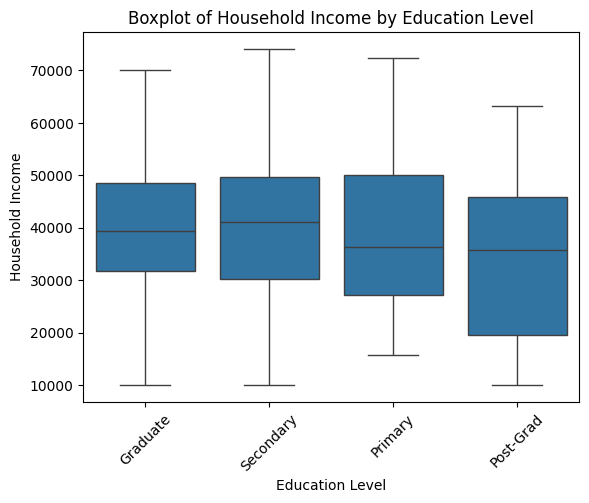

In [64]:
sns.boxplot(x='Education_Level', y='Household_Income', data=data)
plt.title('Boxplot of Household Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Household Income')
plt.xticks(rotation=45)
plt.show()


- **Visualizations :**

- **Histogram and KDE (Kernel Density Estimation) plot**

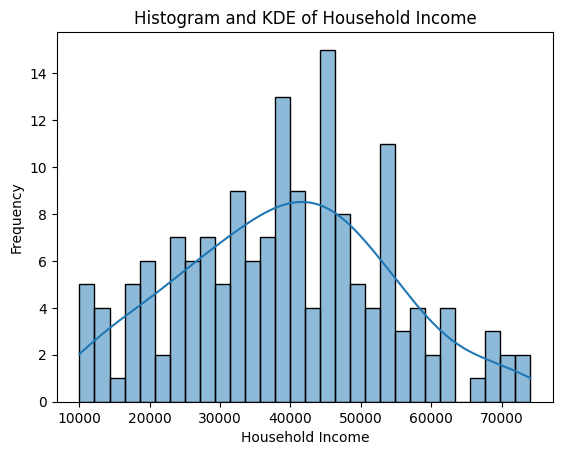

In [65]:
sns.histplot(data['Household_Income'], bins=30, kde=True)
plt.title('Histogram and KDE of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.show()

- **Boxplot comparing Family Size by Education Level**

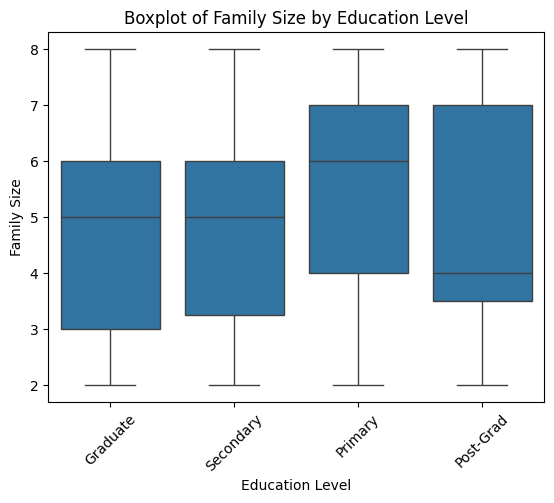

In [66]:
sns.boxplot(x='Education_Level', y='Family_Size', data=data)
plt.title('Boxplot of Family Size by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Family Size')
plt.xticks(rotation=45)
plt.show()

- **Distribution Curve for Age vs. Income**

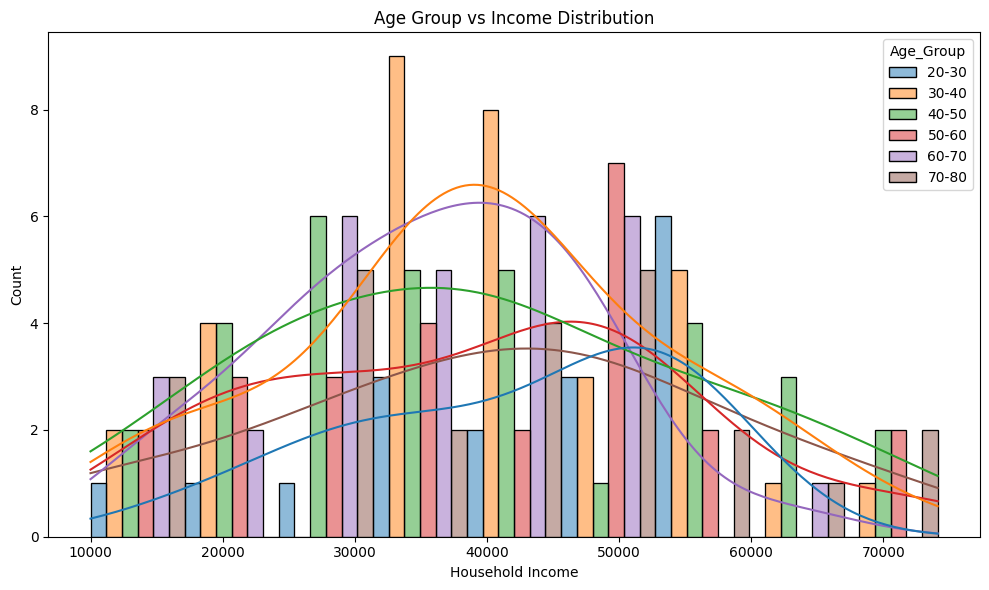

In [75]:
data['Age_Group'] = pd.cut(data['Age_of_Household_Head'],bins=[20, 30, 40, 50, 60, 70, 80],labels=['20-30','30-40','40-50','50-60','60-70','70-80'])
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Household_Income', hue='Age_Group', multiple='dodge',kde=True)
plt.title("Age Group vs Income Distribution")
plt.xlabel("Household Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()